#### **TMNIST | Neural Network Type Classification**

**Name: Shriya Pandita**

**NUID: 002747729**

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Abstract</h2>

The purpose of this notebook is to perform character recognition on the TMINST dataset, which contains 94 characters. Two architectures were used: a simple CNN and a DNN. The CNN consisted of 7 layers and achieved an accuracy of 94.29%, while the DNN achieved an accuracy of 91.34%. The difference in accuracy between the CNN and DNN was 2.95%. Overall, both architectures performed well on the task of character recognition.
The results demonstrate that the CNN ands DNN architecture can effectively recognize characters from the TMINST dataset with high accuracy.

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Data Description</h2>

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood.

The structure of the csv file is:

- The first row contains column headers ['names', 'labels','1','2',…..'784']
- The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
- The 'labels' column contains characters such as '@','E' or '+'

The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style

Dataset used: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters?select=94_character_TMNIST.csv

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Importing necessary libraries</h2>



In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
import keras
from keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore')
%matplotlib inline

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Reading data</h2>



In [2]:
# Loading data
df = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Checking if null values exist
df.isnull().sum()

names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Spliting input and labels</h2>

- to correctly classifyCall the regex_pattern function to extract the necessary pattern the predictions

In [4]:
# Grouping All labels
all_ = list(df['labels'].unique())


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Implementing regex pattern function to extract the necessary patterns</h2>

- Upper Case, Lower Case, Numbers and Symbols

In [5]:
# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)

'^'

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Grouping the labels</h2>

Group 1: Upper Case | Group 2: Lower Case | Group 3: Numbers | Group 4: Symbols

In [6]:
# Creating Groups
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1

In [7]:
# Extracting the features from df into X and the labels into y.
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']] 

In [8]:
# Preparing the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) # Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [9]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [10]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Train - Test Split</h2>

In [11]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Reshaping the data</h2>

The shape of X_train is (205569, 28, 28, 1) with one channel as all the images are in grayscale, and if it was a color image, then the number of channels would be 3 (R, G, B). The image data has been rescaled to lie in the interval [0, 1] instead of [0, 255] to ensure that each dimension has approximately the same scale, which is a recommended normalization practice.


In [12]:
# preping the inputs for training
length, height = 28,28
NCL = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,length, height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,length, height))

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Encoding the data</h2>


In [13]:
# Target into Categorical Values
y_train = to_categorical(y_train, NCL, dtype='int' )
y_test = to_categorical(y_test, NCL, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Dataset Samples</h2>


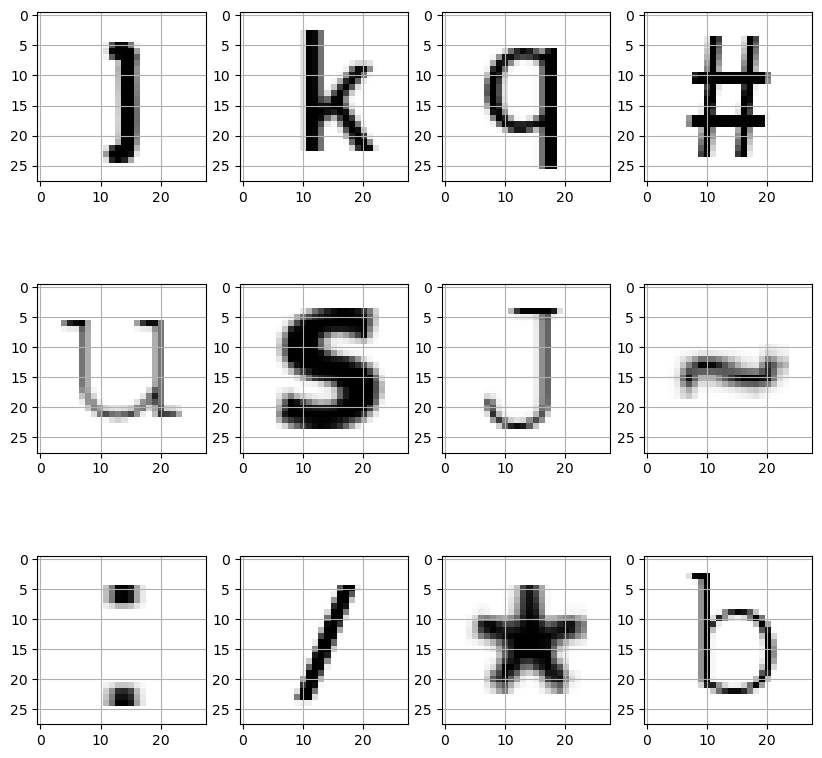

In [14]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Prepping the model</h2>


In [15]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

# Normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')


Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


<h2 style='text-align:center;font-family:Times New Roman;font-size:45px;background-color:LightBlue;border:20px;color:white'>Building the CNN Architecture</h2>


## Image Classification using CNN

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

CNN is a supervised type of Deep learning, most preferable used in image recognition and computer vision. Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables.

A convolution in CNN is nothing but a element wise multiplication i.e. dot product of the image matrix and the filter.
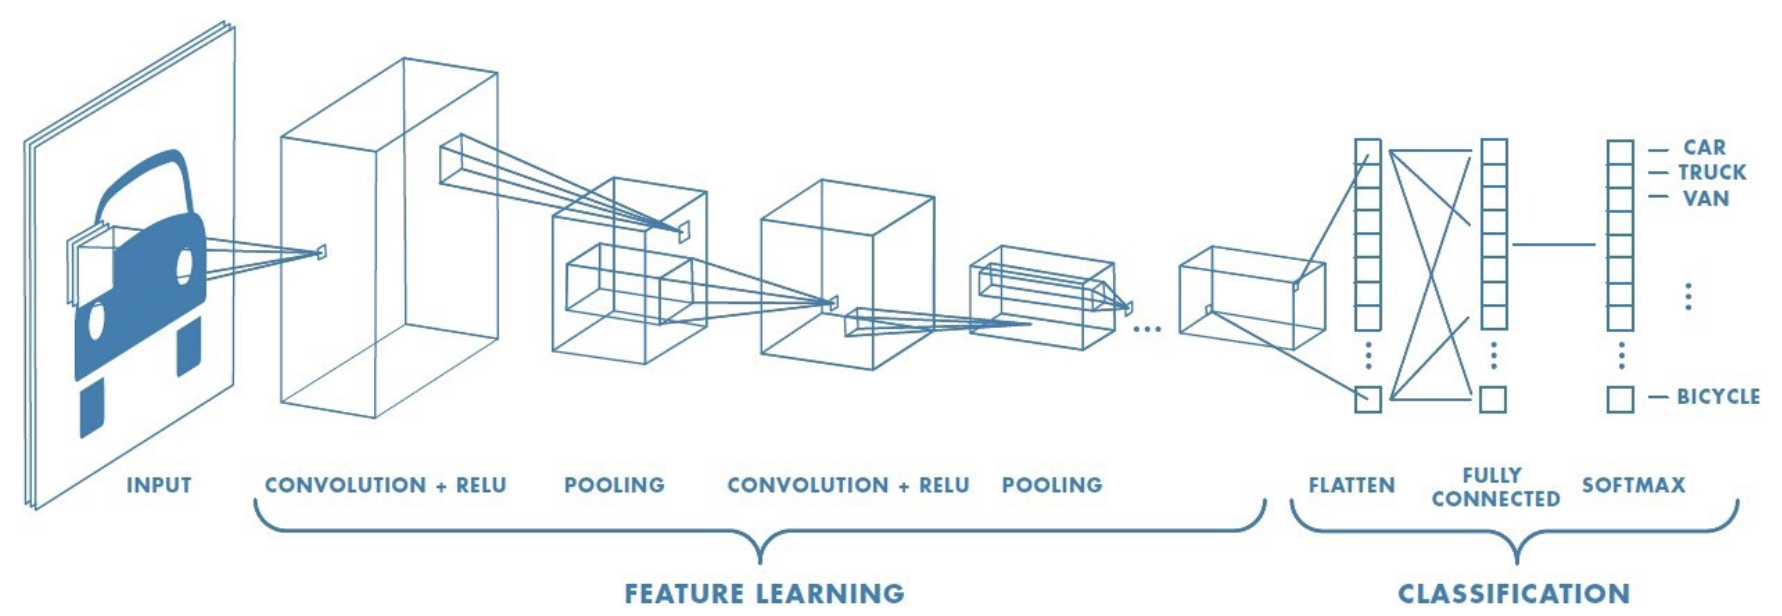

The image above shows us the various layers in a CNN. A convolution operation takes place between the image and the filter and the convolved feature is generated. Each filter in a CNN, learns different characteristic of an image.

The input image is processed in the first convolutional layer using the filter-weights. This results in new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased.

These smaller images are then processed in the second convolutional layer. We need filter-weights for each of these channels, and we need filter-weights for each output channel of this layer. 

The output of the second convolutional layer are then flattened to a single vector of length, which is used as the input to a fully-connected layer. This feeds into another fully-connected layer with neurons-one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Implementation of Layers</h2>


* Activation Function in Convolutional Layers: **ReLU**

* Activation function in Output Layer: **Softmax** 

    The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

* Loss function: **Categorical Cross-entropy**
    
    The Loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. 
    
    Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

* Optimizer: **Adam**
    
    The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
   

In [16]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - > Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (length, height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCL, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Visual representation of the layers implemented with their flow</h2>


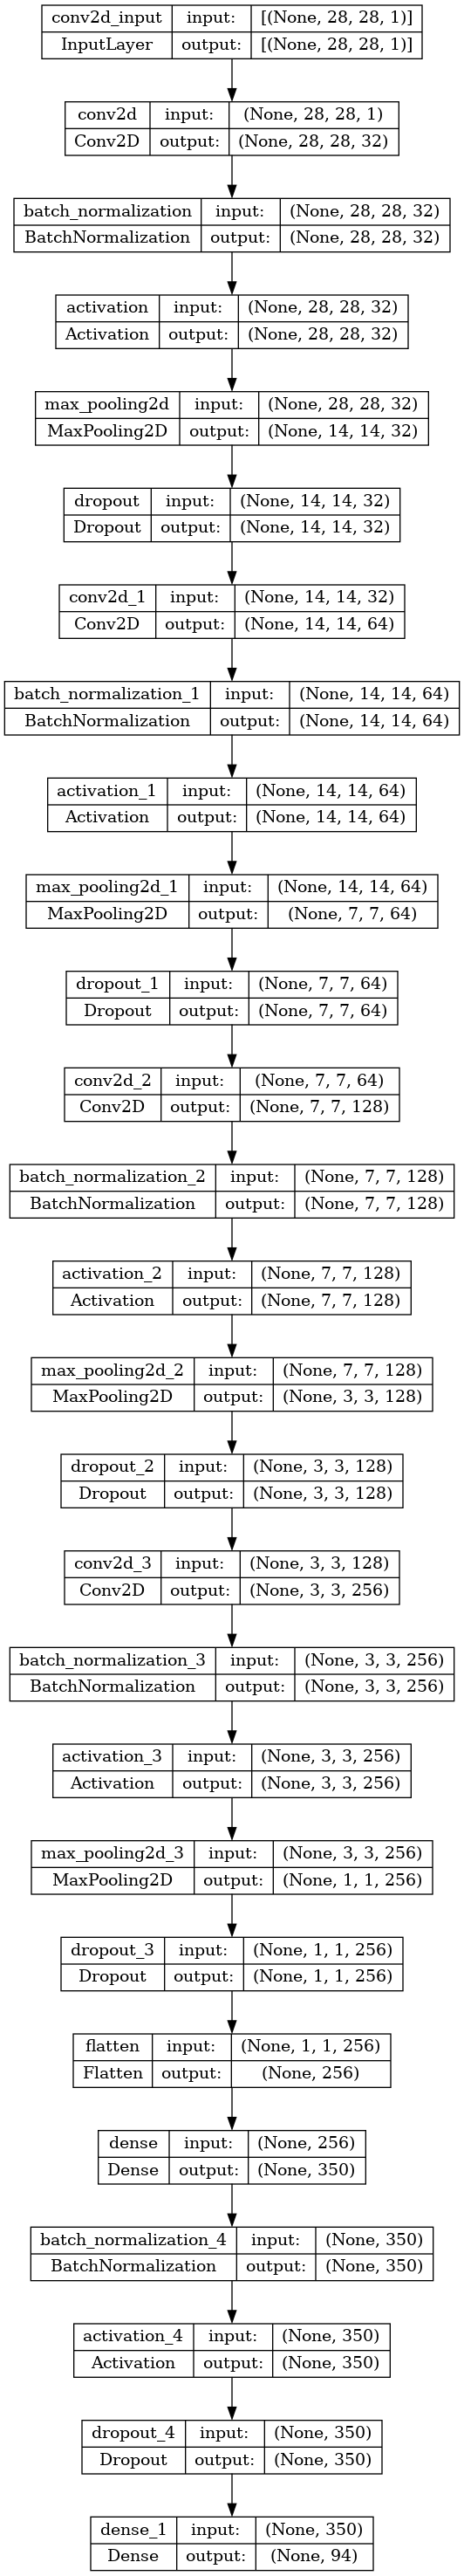

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='tmnist.png', show_shapes=True, show_layer_names=True)

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Layers implemented</h2>

- Input Layer: This layer takes in the raw image data and passes it on to the next layer.

- Convolutional Layer: This layer applies a set of filters (small matrices) to the input image in order to extract features from it. Each filter produces a feature map, which highlights different aspects of the image.

- Activation Layer: This layer applies an activation function (such as ReLU) to each element of the feature maps in order to introduce nonlinearity into the network.

- Pooling Layer: This layer reduces the spatial dimensionality of the feature maps by performing down-sampling, which helps to reduce the number of parameters in the network and improve its robustness to translation.

- Fully-Connected Layer: This layer connects every neuron in the previous layer to every neuron in the next layer, just like in a traditional neural network. This layer is responsible for performing the final classification decision.

- Output Layer: This layer produces the final output of the network, which is typically a probability distribution over the different classes.

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Hyperparameters</h2>


In [18]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 64

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Model Training</h2>


In [19]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/64


2023-04-17 02:16:11.614624: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3427/3427 [==============================] - 36s 8ms/step - loss: 0.6316 - accuracy: 0.8152 - val_loss: 0.3605 - val_accuracy: 0.8857
Epoch 2/64
3427/3427 [==============================] - 27s 8ms/step - loss: 0.3956 - accuracy: 0.8789 - val_loss: 0.2958 - val_accuracy: 0.9070
Epoch 3/64
3427/3427 [==============================] - 26s 8ms/step - loss: 0.3537 - accuracy: 0.8918 - val_loss: 0.2405 - val_accuracy: 0.9245
Epoch 4/64
3427/3427 [==============================] - 26s 8ms/step - loss: 0.3342 - accuracy: 0.8969 - val_loss: 0.2289 - val_accuracy: 0.9260
Epoch 5/64
3427/3427 [==============================] - 26s 8ms/step - loss: 0.3192 - accuracy: 0.9008 - val_loss: 0.2314 - val_accuracy: 0.9226
Epoch 6/64
3427/3427 [==============================] - 26s 8ms/step - loss: 0.3085 - accuracy: 0.9043 - val_loss: 0.2196 - val_accuracy: 0.9295
Epoch 7/64
3427/3427 [==============================] - 26s 7ms/step - loss: 0.3003 - accuracy: 0.9064 - val_loss: 0.2098 - val_accuracy: 0.9

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Evaluation: Model Performance</h2>

- **Accuracy Score : 94.22%**

In [20]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:94.22%


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Visualization: Model Performance</h2>


In [21]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    plt.title('Model Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].legend(['Train', 'Validation'], loc='lower right')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].legend(['Train', 'Validation'], loc='upper right')
    plt.show()

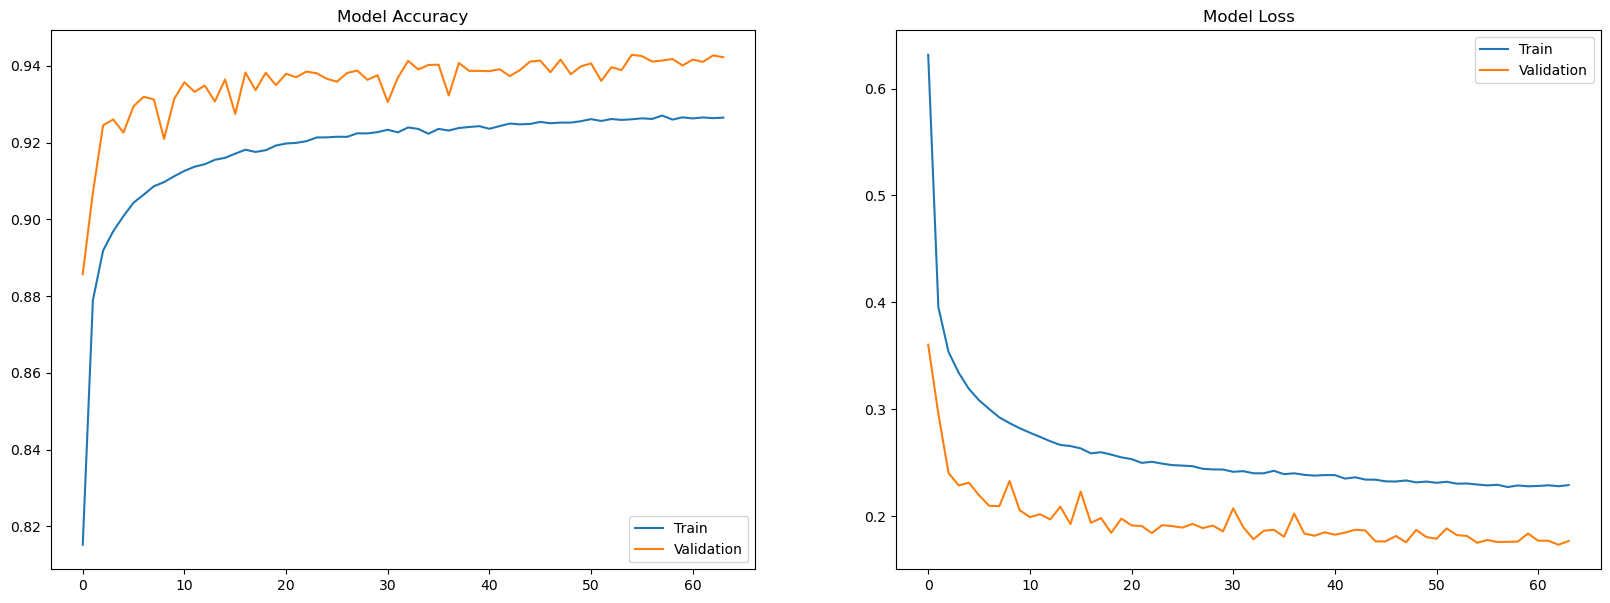

In [22]:
Plott(history)

**Interpretation of the above graphs:**

- The similarity of the trend between the training and test datasets indicates that the model generalizes well on unseen data.
- The decreasing trend in model loss for both datasets suggests that the model is improving during training and can potentially achieve better performance with more training epochs.

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Confusion Matrix</h2>


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          top_values=10):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Only show top values
    threshold = np.max(cm) / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if cm[i, j] > threshold:
                plt.text(j, i, format(cm[i, j], '.2f'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


1714/1714 [==============================] - 4s 2ms/step


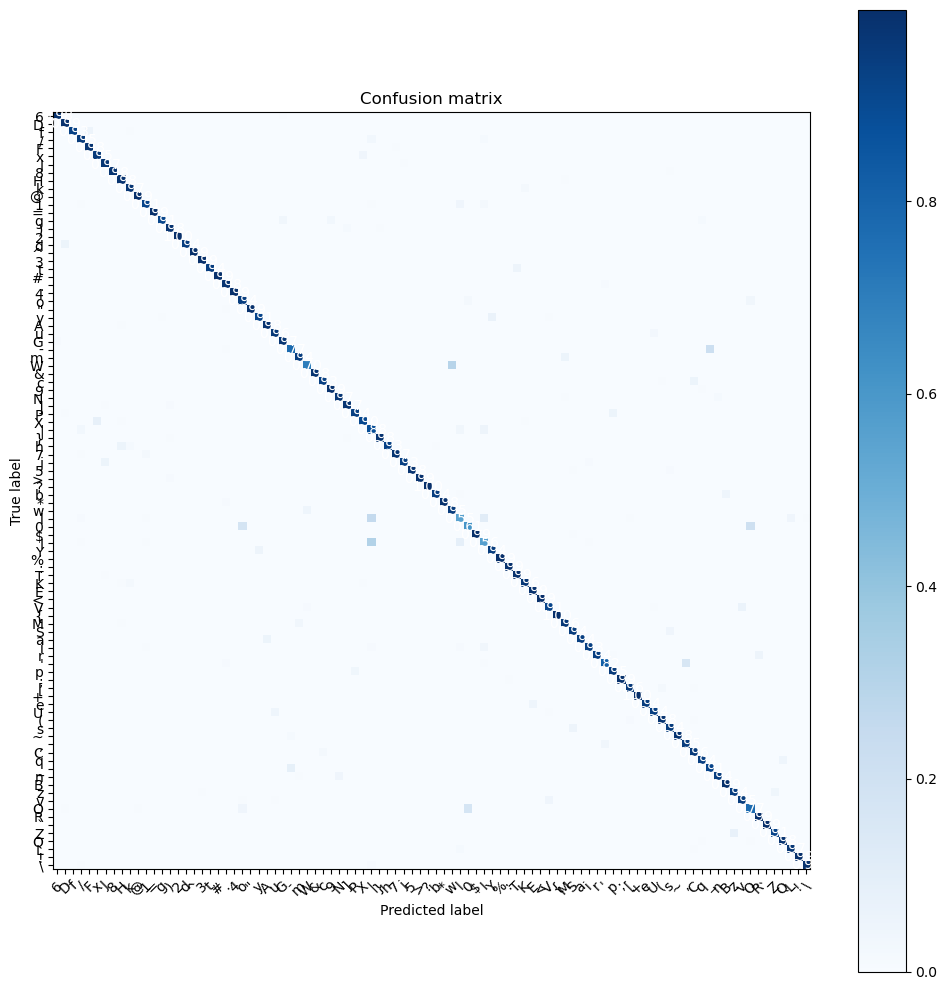

In [24]:
# Create confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=label_dict_inv.values(), normalize=True, top_values=10)
plt.show()


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Final Predictions: Using Trained Model</h2>


1/1 [==============================] - 0s 23ms/step


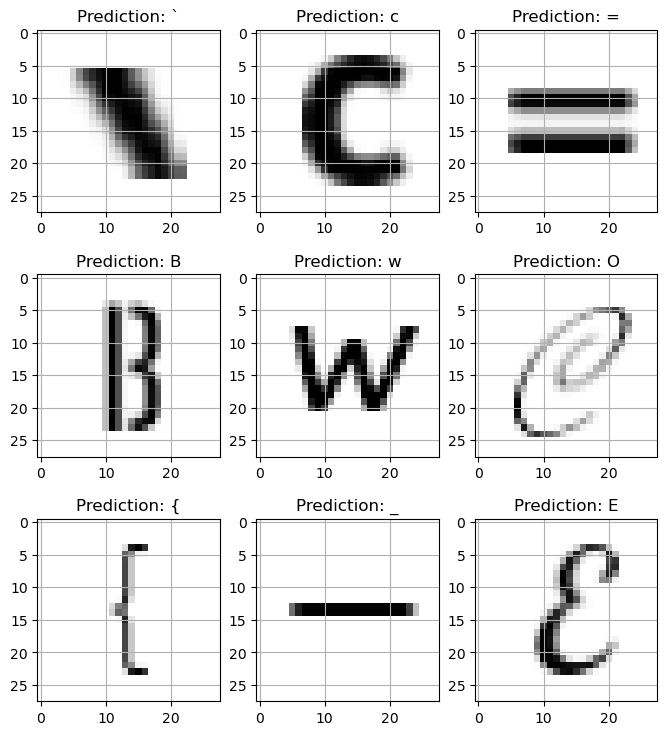

In [25]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Prediction Failure: With Example</h2>


In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = X_test[errors]


1714/1714 [==============================] - 4s 2ms/step


In [27]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-2:]


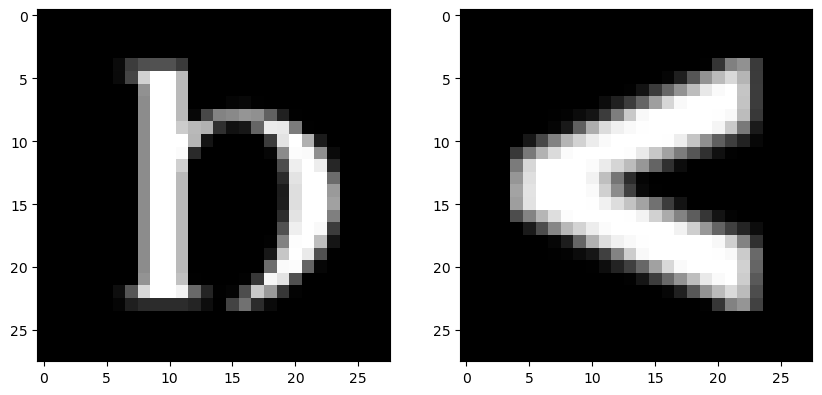

In [28]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(10,10))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>ROC Curve</h2>

- Performance Evaluation for each class

1714/1714 [==============================] - 4s 2ms/step


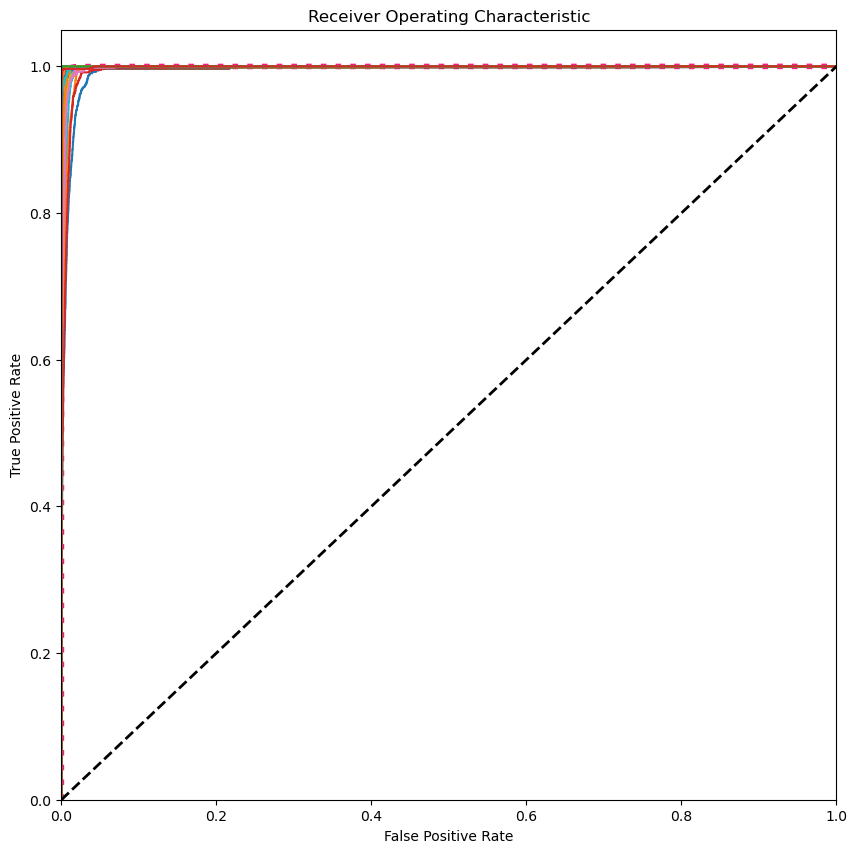

In [29]:
# Predicting probabilities for test set
y_pred_proba = model.predict(X_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NCL):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting ROC curve for each class and micro-average
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
                                               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(NCL):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


<h2 style='text-align:center;font-family:Times New Roman;font-size:45px;background-color:LightBlue;border:20px;color:white'>Building the DNN Architecture</h2>


### Deep Learning
Deep learning is inspired by the functionality of human brain cells called artificial neural network. Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data.

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data. Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning.

Practical examples of deep learning are Virtual assistants, vision for driverless cars, money laundering, face recognition and many more.


In [30]:
model2 = Sequential()

model2.add(Flatten(input_shape=(length, height, RGB)))
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Dense(NCL, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                      

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Visual representation of the layers implemented with their flow</h2>


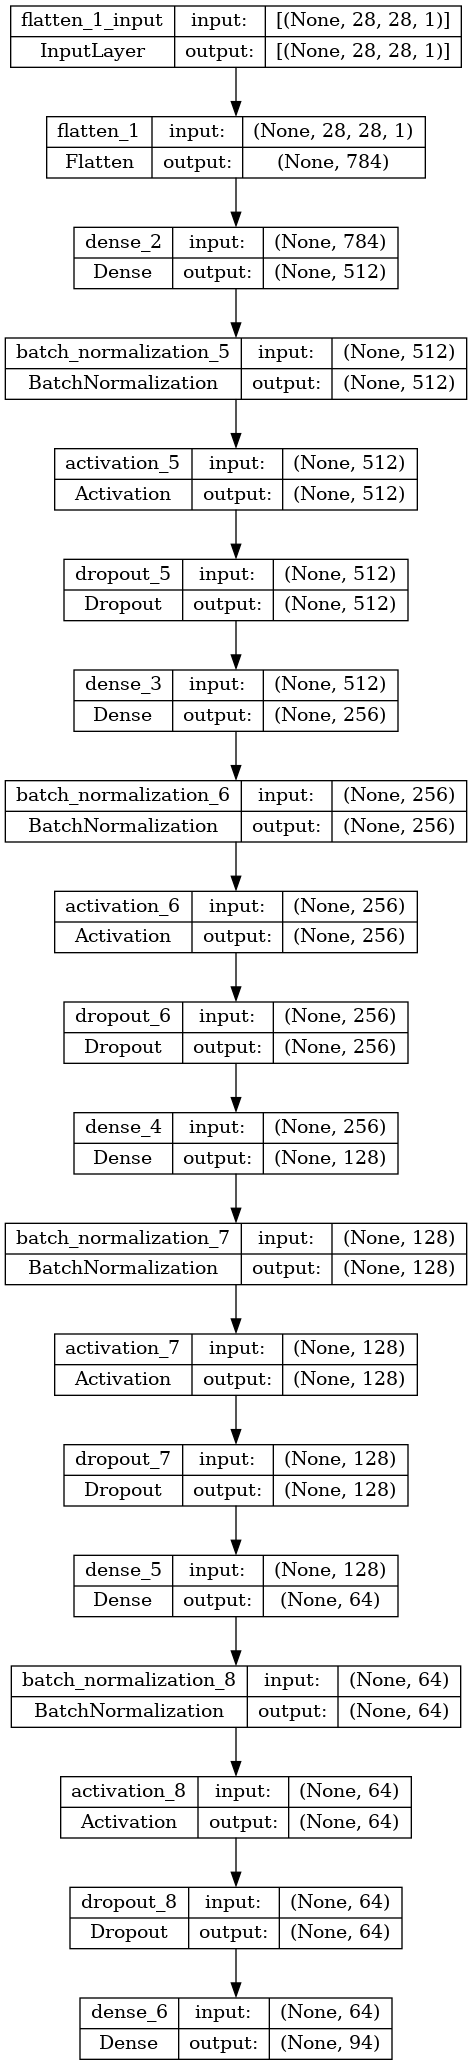

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='tmnist2.png', show_shapes=True, show_layer_names=True)

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Hyperparameters</h2>


In [32]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
batch_size = 64
epochs = 32
loss='categorical_crossentropy'
metrics = ['accuracy']
model2.compile(loss = loss, optimizer = optimizer, metrics=metrics)


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Training the model</h2>


In [33]:
#Training
history2= model2.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = batch_size ,
                   epochs = epochs, verbose = 1)

Epoch 1/32
3427/3427 [==============================] - 29s 7ms/step - loss: 1.0303 - accuracy: 0.6995 - val_loss: 0.5014 - val_accuracy: 0.8366
Epoch 2/32
3427/3427 [==============================] - 25s 7ms/step - loss: 0.7214 - accuracy: 0.7842 - val_loss: 0.4660 - val_accuracy: 0.8457
Epoch 3/32
3427/3427 [==============================] - 24s 7ms/step - loss: 0.6494 - accuracy: 0.8084 - val_loss: 0.4351 - val_accuracy: 0.8542
Epoch 4/32
3427/3427 [==============================] - 24s 7ms/step - loss: 0.6074 - accuracy: 0.8193 - val_loss: 0.4018 - val_accuracy: 0.8681
Epoch 5/32
3427/3427 [==============================] - 24s 7ms/step - loss: 0.5735 - accuracy: 0.8301 - val_loss: 0.3818 - val_accuracy: 0.8744
Epoch 6/32
3427/3427 [==============================] - 24s 7ms/step - loss: 0.5514 - accuracy: 0.8363 - val_loss: 0.3785 - val_accuracy: 0.8781
Epoch 7/32
3427/3427 [==============================] - 24s 7ms/step - loss: 0.5315 - accuracy: 0.8419 - val_loss: 0.3596 - val_ac

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Evaluation: Model Performance</h2>

- **Accuracy Score: 90.97%**

In [34]:
#Evaluating model accuracy on test data
score1 = model2.evaluate(X_test,y_test, batch_size = batch_size,verbose = 0)
print(f"Test Accuracy Percentage for DNN: {round(score1[1],4)*100}%")

Test Accuracy Percentage for DNN: 90.97%


<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Visualisation: Model Performance</h2>


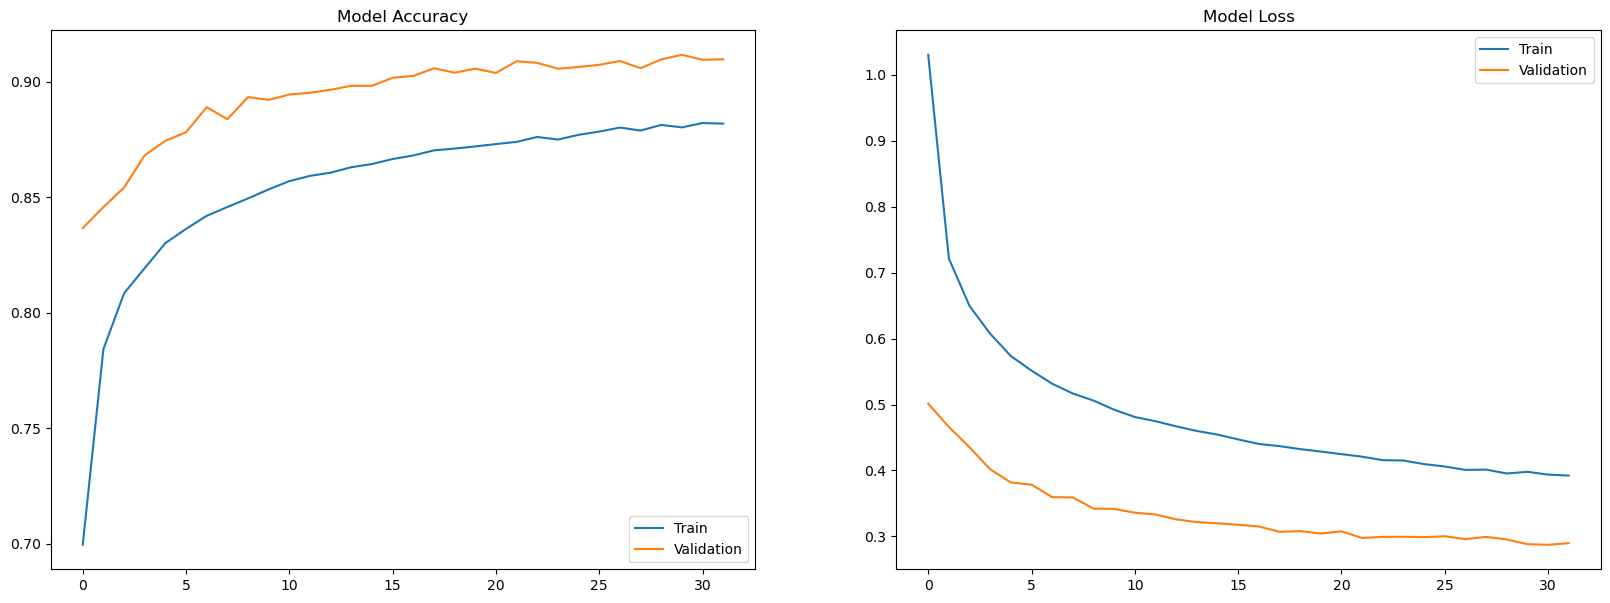

In [35]:
Plott(history2)

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Confusion Matrix</h2>


1714/1714 [==============================] - 3s 2ms/step


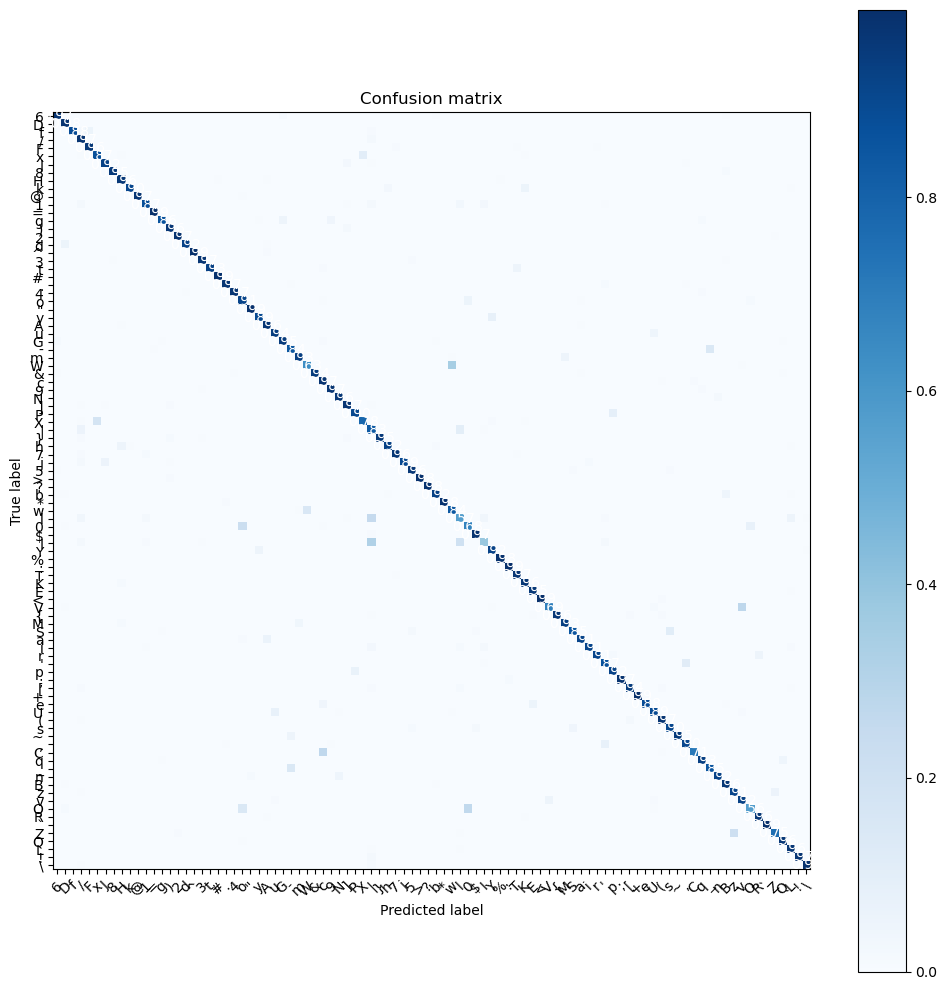

In [36]:
# Create confusion matrix
y_pred = model2.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=label_dict_inv.values(), normalize=True, top_values=10)
plt.show()

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Final Predictions: Using Trained Model</h2>


1/1 [==============================] - 0s 23ms/step


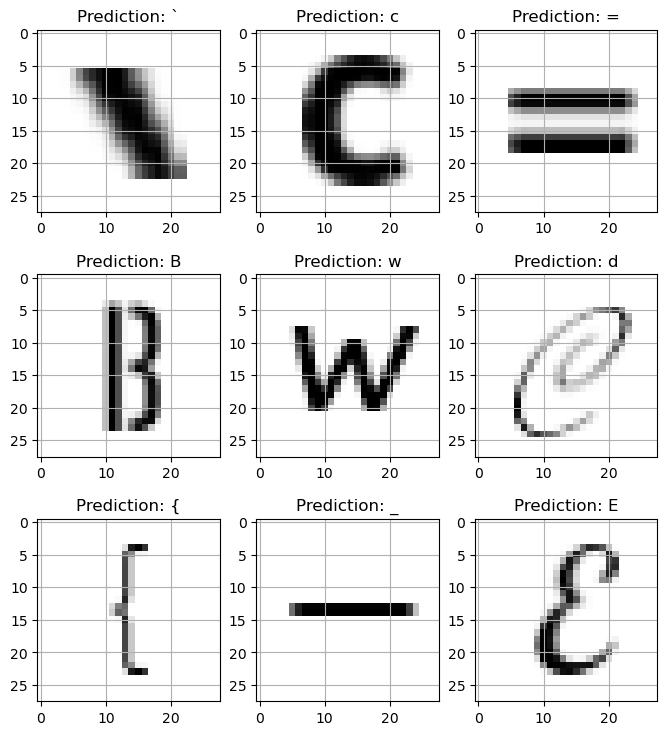

In [37]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model2.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>Prediction Failure with Example</h2>


In [38]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = X_test[errors]


1714/1714 [==============================] - 3s 2ms/step


In [39]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-2:]


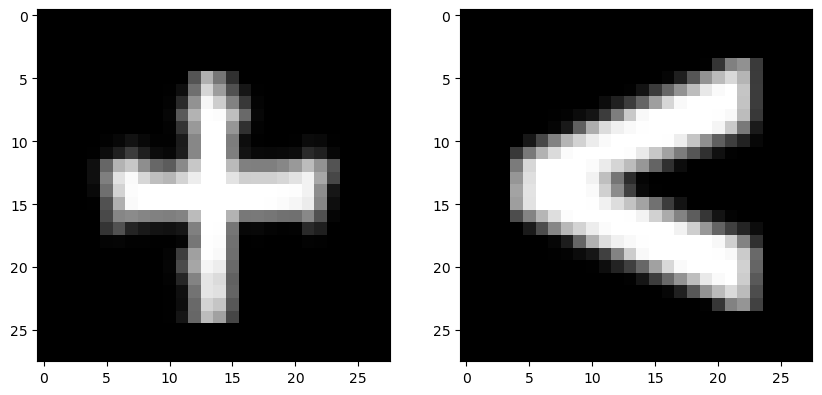

In [40]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(10,10))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')

<h2 style='text-align:center;font-family:Times New Roman;font-size:25px;background-color:pink;border:20px;color:white'>ROC Curve</h2>

- Performance Evaluation for each class

1714/1714 [==============================] - 3s 2ms/step


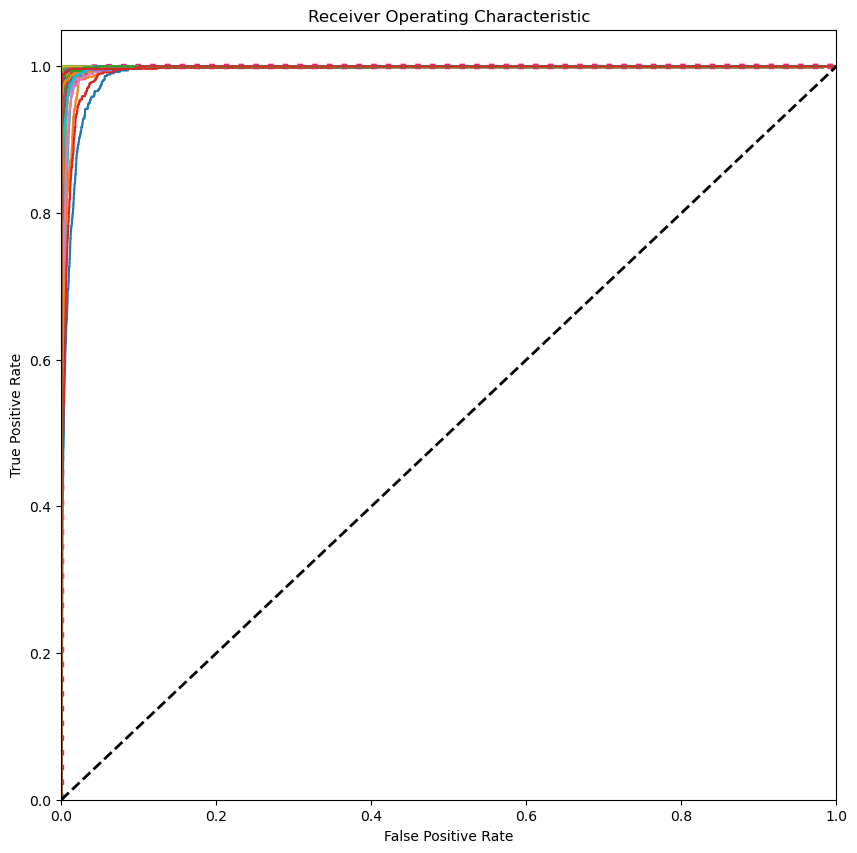

In [41]:
# Predicting probabilities for test set
y_pred_proba = model2.predict(X_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NCL):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting ROC curve for each class and micro-average
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
                                               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(NCL):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

<h2 style='text-align:center;font-family:Times New Roman;font-size:45px;background-color:LightBlue;border:20px;color:white'>Comparision between the two architectures: CNN and DNN</h2>

- **Test Accuracy Percentage for CNN: 94.22%**
- **Test Accuracy Percentage for DNN: 90.97%**
- **The difference of accuravy between CNN and DNN is 3.25%**

In [42]:
print(f"Test Accuracy Percentage for CNN: {round(score[1],4)*100}%")
print(f"Test Accuracy Percentage for DNN: {round(score1[1],4)*100}%")
diff=round(score[1],4)-round(score1[1],4)
print(f"The difference of accuracy between CNN and DNN is {round(diff,4)*100}%")

Test Accuracy Percentage for CNN: 94.22%
Test Accuracy Percentage for DNN: 90.97%
The difference of accuravy between CNN and DNN is 3.25%


<h2 style='text-align:center;font-family:Times New Roman;font-size:45px;background-color:LightBlue;border:20px;color:white'>Conclusion</h2>

- **The model achieved 100% accuracy on a small set of 12 predictions.**

- **The accuracy on the test dataset was observed to be 94.22%, indicating the model's effectiveness in character recognition.**

- **Considering the use of a simple CNN architecture, the achieved accuracy can be considered decent.**

# License
### References

* https://keras.io/
* https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter
* https://en.wikipedia.org/wiki/Convolutional_neural_network
* https://www.geeksforgeeks.org/cnn-image-data-pre-processing-with-generators/
* https://en.wikipedia.org/wiki/Neural_network

Copyright (c) 2023 Shriya Pandita

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.